# **VERINDRA HERNANDA PUTRA - 2426 - CC GENERAL**

# ✦ **LIBRARY**

In [1]:
# CaAs_Verindra Hernanda Putra - 1303223055 - 2426

# Import Library

# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Scaler
from sklearn.preprocessing import StandardScaler

# ✦ **FUNGSI**

In [2]:
# Buat Boxplot semua kolom
def create_boxplots(df):

  # Pilih Kolom Numerikal
  numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

  # Hitung dimensi figure
  num_subplots = len(numeric_cols)
  nrows = int(np.sqrt(num_subplots))
  ncols = int(np.ceil(num_subplots / nrows))

  # Buat figure
  plt.figure(figsize=(15, 10))

  # Buat subplots dan boxplots
  for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

  plt.tight_layout()
  plt.show()
    
# Deteksi Outlier
def deteksi_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    return data[(data[column] < batas_bawah) | (data[column] > batas_atas)]

# Hitung nilai_cap
def nilai_cap(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  cap_value = Q3 + 1.5 * IQR

  return cap_value

# Hitung nilai_floor
def nilai_floor(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  floor_value = Q1 - 1.5 * IQR

  return floor_value

# Cap/Floor
def cap_floor(df, column):
  floor = nilai_floor(df, column)
  cap = nilai_cap(df, column)
  df[column] = df[column].clip(lower=floor, upper=cap)

  return df

# Cap/Floor All
def cap_floor_all_columns(df):

  for col in df.select_dtypes(include=['float64']).columns:
    floor = nilai_floor(df, col)
    cap = nilai_cap(df, col)
    df = cap_floor(df, col)

  return df

# ✦ **TENTANG DATASET**

In [3]:
# Panggil Dataset
df = pd.read_csv("D:/OPREC_MBC/WEEK_5/Dataset/CC GENERAL.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**GOALS**

Baik disini itu merupakan dataset yang bertujuan untuk memprediksi umur dari sebuah fossil berdasarkan fitur-fitur yang telah disediakan

*   **Fitur Target :** -
*   **Model :** Regresi

# **➥ DATA CLEANING**

## ♢ **DROP IRRELEVANT COLUMNS**

Pertama-tama, kita akan menghapus kolom yang tidak relevan terlebih dahulu. Namun disini ternyata semua kolom terlihat logis dan berhubungan dengan fitur target, maka untuk saat ini kita tidak akan menghapus satupun kolom yang ada

In [5]:
kolom = ['CUST_ID']

# Drop Kolom yang tidak Relevan
df = df.drop(columns = kolom, axis=1)

## ♢ **HANDLING DUPLICATION**

Atasi nilai duplikat yang terdeteksi pada dataset

In [6]:
# Cek Duplikasi
df.duplicated().sum()

np.int64(0)

**DATASET AMAN DARI DUPLICATE VALUES** ✔️

## ♢ **HANDLING MISSING VALUES**

Atasi missing values yang terdeteksi pada dataset

In [7]:
missing_values = df.isnull().sum()

# Hitung Presentase Missing Values
presentase_missing = (df.isnull().sum() / len(df)) * 100

# Tampilkan Hasil Missing Values
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Presentase': presentase_missing})
print(missing_info)

                                  Missing Values  Presentase
BALANCE                                        0    0.000000
BALANCE_FREQUENCY                              0    0.000000
PURCHASES                                      0    0.000000
ONEOFF_PURCHASES                               0    0.000000
INSTALLMENTS_PURCHASES                         0    0.000000
CASH_ADVANCE                                   0    0.000000
PURCHASES_FREQUENCY                            0    0.000000
ONEOFF_PURCHASES_FREQUENCY                     0    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY               0    0.000000
CASH_ADVANCE_FREQUENCY                         0    0.000000
CASH_ADVANCE_TRX                               0    0.000000
PURCHASES_TRX                                  0    0.000000
CREDIT_LIMIT                                   1    0.011173
PAYMENTS                                       0    0.000000
MINIMUM_PAYMENTS                             313    3.497207
PRC_FULL_PAYMENT        

**TERDETEKSI MISSING VALUES**

Telah terdeteksi adanya missing value, oleh karena itu langkah selanjutnya adalah kita akan mengatasi missing value tersebut dengan melakukan analisis terlebih dahulu untuk menentukan penanganan yang tepat kepada missing value tersebut.

Ada beberapa proses handling missing value yang bisa kita gunakan, yaitu :

- Mean (Rata-Rata)
- Median (Nilai Tengah)
- Modus (Nilai eengan frekuensi Terbanyak)
- Custom (Nilai Custom yang relevan)
- Menghapus

Kita akan melakukan analisis dan mengatasi secara satu persatu pada setiap kolom yang mengandung Missing Values

**1. CREDIT_LIMIT**

Pada kolom ini hanya terdeteksi 1 missing value, disini saya memutuskan untuk menghapus 1 baris yang mengandung missing value tersebut

In [8]:
# Tampilkan missing value pada kolom CREDIT_LIMIT
null = pd.isnull(df["CREDIT_LIMIT"])
df[null]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


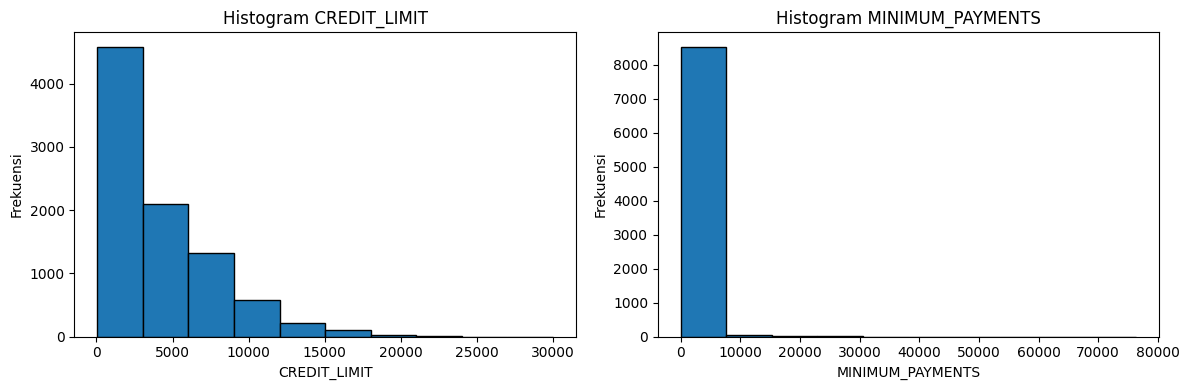

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['CREDIT_LIMIT'], edgecolor='black')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frekuensi')
plt.title('Histogram CREDIT_LIMIT')

plt.subplot(1, 2, 2)
plt.hist(df['MINIMUM_PAYMENTS'], edgecolor='black')
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Frekuensi')
plt.title('Histogram MINIMUM_PAYMENTS')

plt.tight_layout()
plt.show()

In [10]:
# Hapus NaN pada kolom CREDIT_LIMIT
df = df.dropna(subset=['CREDIT_LIMIT'])

**2. MINIMUM_PAYMENTS**

Pada kolom ini hanya terdeteksi lumayan banyak Missing Value, yaitu sebanyak 313

In [11]:
# Tampilkan missing value pada kolom MINIMUM_PAYMENT
null = pd.isnull(df["MINIMUM_PAYMENTS"])
df[null]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


**ANALISIS** 🕵

Sebelumnya, saya telah melakukan sedikit research dan menemukan bahwa pada kolom MINIMUM_PAYMENT memiliki hubungan yang logis dengan kolom PAYMENT. Yang dimana artinya jumlah value pada **kolom PAYMENT tidak mungkin lebih kecil dari kolom MINIMUM_PAYMENT**, hal tersebut tidak logis sekali jika terjadi. Namun disini setelah di cek terdapat beberapa kesalahan data yang terjadi

In [12]:
# Baris dengan PAYMENT lebih kecil dari MINIMUM_PAYMENT
df[df['PAYMENTS'] < df['MINIMUM_PAYMENTS']]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,735.652303,1.000000,619.60,255.62,363.98,546.902403,1.000000,0.166667,0.833333,0.166667,5,16,1000.0,106.138603,337.294767,0.00,6
8939,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


**NEXT STEP**

Maka dari itu disini kita akan melakukan proses cleaning data sekaligus Preprocessing untuk memperbaiki data yang salah tersebut pada kolom MINIMUM_PAYMENT. Dengan langkah-langkah :

* Jika nilai PAYMENTS = 0, maka MINIMUM_PAYMENT = 0
* Jika nilai PAYMENTS < MINIMUM_PAYMENT, maka MINIMUM_PAYMENT = PAYMENT

In [13]:
# Fungsi Perbaiki Data
def perbaiki_data(row):
    if pd.isna(row['MINIMUM_PAYMENTS']):
        return row['PAYMENTS']
    elif row['PAYMENTS'] == 0:
        return 0
    elif row['PAYMENTS'] < row['MINIMUM_PAYMENTS']:
        return row['PAYMENTS']
    else:
        return row['MINIMUM_PAYMENTS']

# Terapkan fungsi pada kolom 'MINIMUM_PAYMENT'
df['MINIMUM_PAYMENTS'] = df.apply(perbaiki_data, axis=1)

In [14]:
missing_values = df.isnull().sum()

# Hitung Presentase Missing Values
presentase_missing = (df.isnull().sum() / len(df)) * 100

# Tampilkan Hasil Missing Values
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Presentase': presentase_missing})
print(missing_info)

                                  Missing Values  Presentase
BALANCE                                        0         0.0
BALANCE_FREQUENCY                              0         0.0
PURCHASES                                      0         0.0
ONEOFF_PURCHASES                               0         0.0
INSTALLMENTS_PURCHASES                         0         0.0
CASH_ADVANCE                                   0         0.0
PURCHASES_FREQUENCY                            0         0.0
ONEOFF_PURCHASES_FREQUENCY                     0         0.0
PURCHASES_INSTALLMENTS_FREQUENCY               0         0.0
CASH_ADVANCE_FREQUENCY                         0         0.0
CASH_ADVANCE_TRX                               0         0.0
PURCHASES_TRX                                  0         0.0
CREDIT_LIMIT                                   0         0.0
PAYMENTS                                       0         0.0
MINIMUM_PAYMENTS                               0         0.0
PRC_FULL_PAYMENT        

**DONE**

Baik, data yang salah dan missing value sudah teratasi. Kita bisa lanjut ke langkah selanjutnya

## ♢ **CHECK DATA TYPE**

Cek sekilas tipe-tipe variabel yang terkandung dalam dataset


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

**ANALISIS** 🕵

Jika dilihat, ternyata semuanya merupakan kolom numerikal.

## ♢ **HANDLING OUTLIERS**

Kita atasi Outlier yang terdeteksi terlebih dahulu

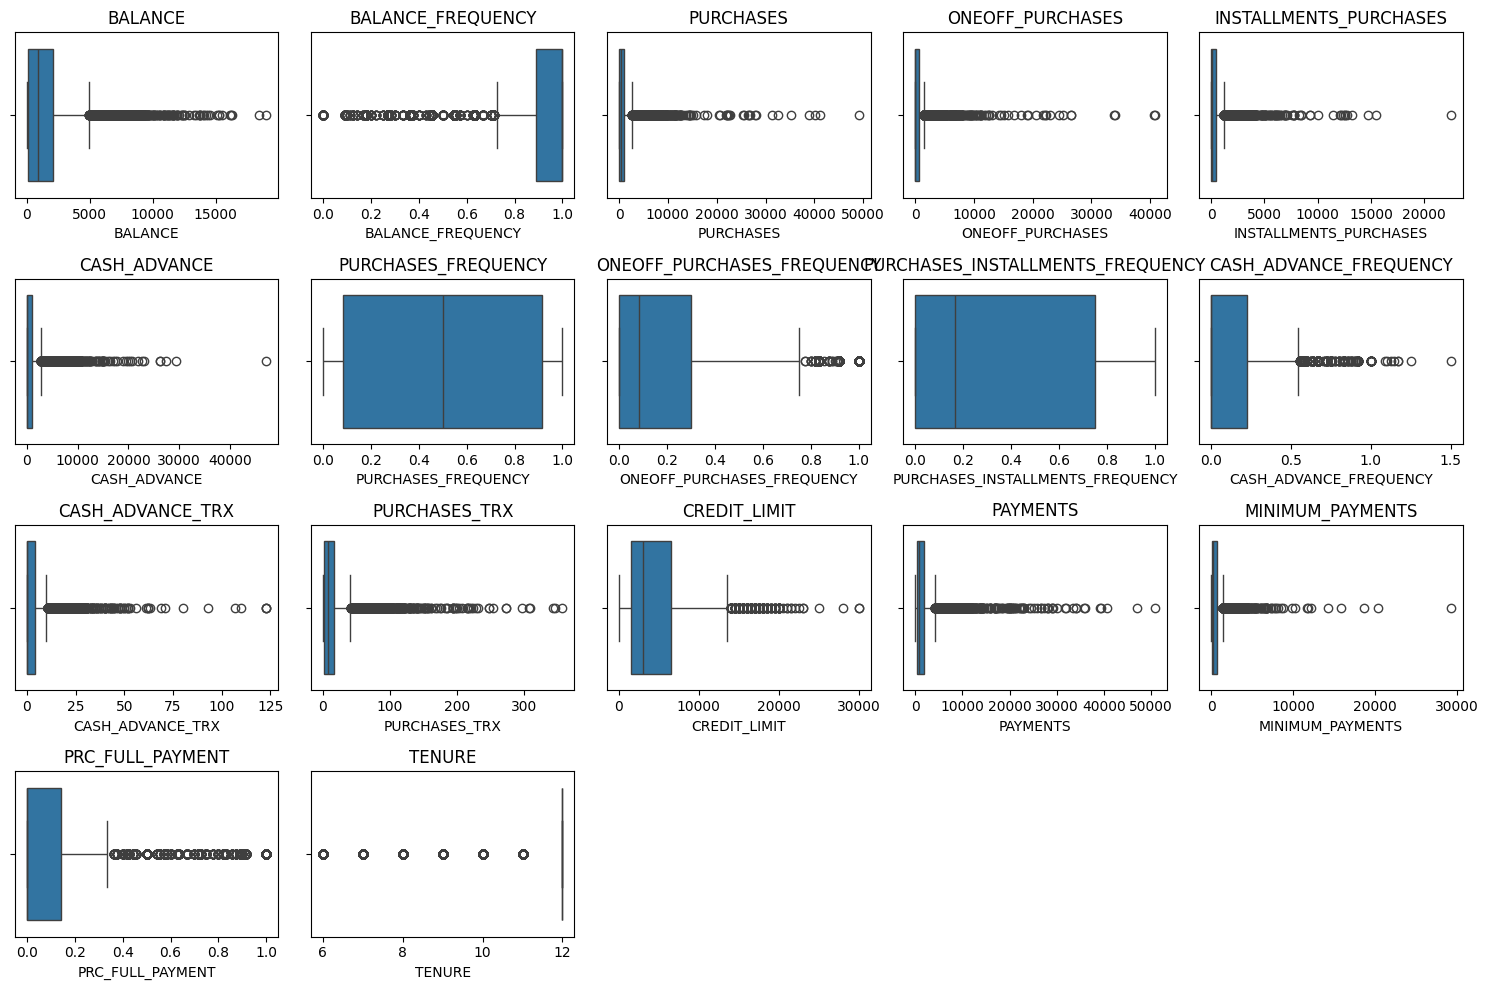

In [16]:
create_boxplots(df)

**ANALISIS** 🕵

Terdapat beberapa outlier yang terdeteksi, disini pertama-tama yang akan kita lakukan adalah membatasi sedikit nilai outlier yang ada pada beberapa kolom. (Membatasi outlier dengan tingkat jarak sangat tinggi dibandingkan outlier lainnya)

In [17]:
df = df[(df['BALANCE'] < 15000)]
df = df[(df['PURCHASES'] < 40000)]
df = df[(df['ONEOFF_PURCHASES'] < 30000)]
df = df[(df['INSTALLMENTS_PURCHASES'] < 20000)]
df = df[(df['CASH_ADVANCE'] < 30000)]
df = df[(df['PAYMENTS'] < 50000)]
df = df[(df['MINIMUM_PAYMENTS'] < 20000)]

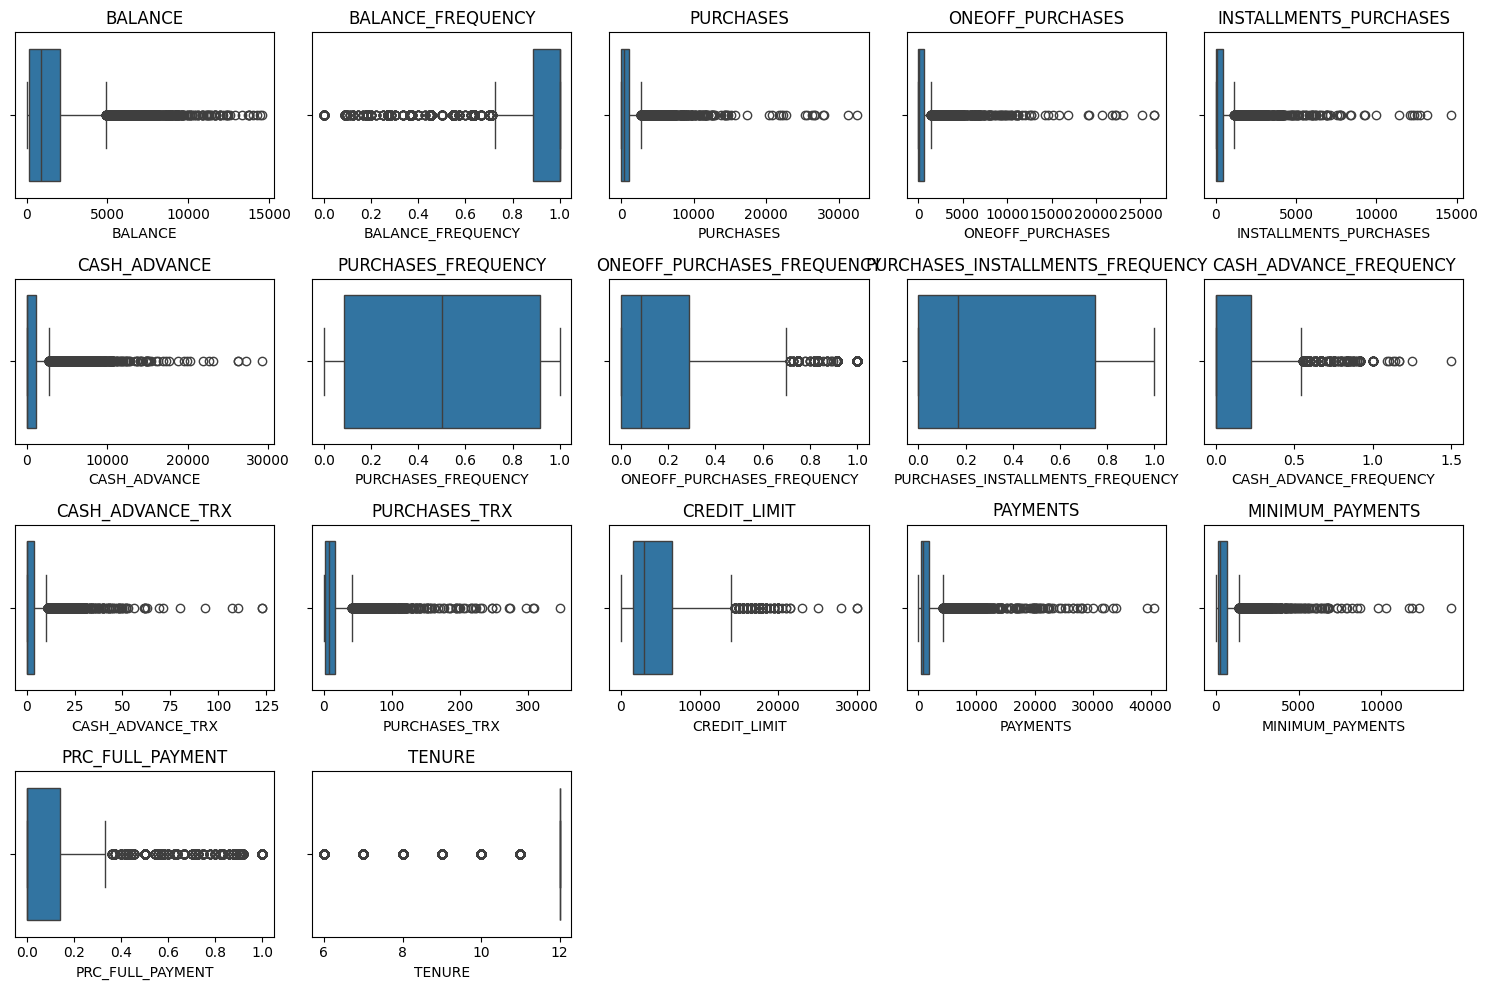

In [18]:
create_boxplots(df)

In [19]:
# Tampilkan
print("Jumlah Outlier pada semua kolom")
for column in df:
    outliers = deteksi_outlier(df, column)
    print(f"{column}: {outliers.shape[0]}")

Jumlah Outlier pada semua kolom
BALANCE: 697
BALANCE_FREQUENCY: 1490
PURCHASES: 798
ONEOFF_PURCHASES: 1011
INSTALLMENTS_PURCHASES: 865
CASH_ADVANCE: 1025
PURCHASES_FREQUENCY: 0
ONEOFF_PURCHASES_FREQUENCY: 928
PURCHASES_INSTALLMENTS_FREQUENCY: 0
CASH_ADVANCE_FREQUENCY: 520
CASH_ADVANCE_TRX: 799
PURCHASES_TRX: 757
CREDIT_LIMIT: 197
PAYMENTS: 800
MINIMUM_PAYMENTS: 788
PRC_FULL_PAYMENT: 1471
TENURE: 1364


In [20]:
kolom = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Log Transformasi
for col in kolom:
    df[col] = np.log(1 + df[col])

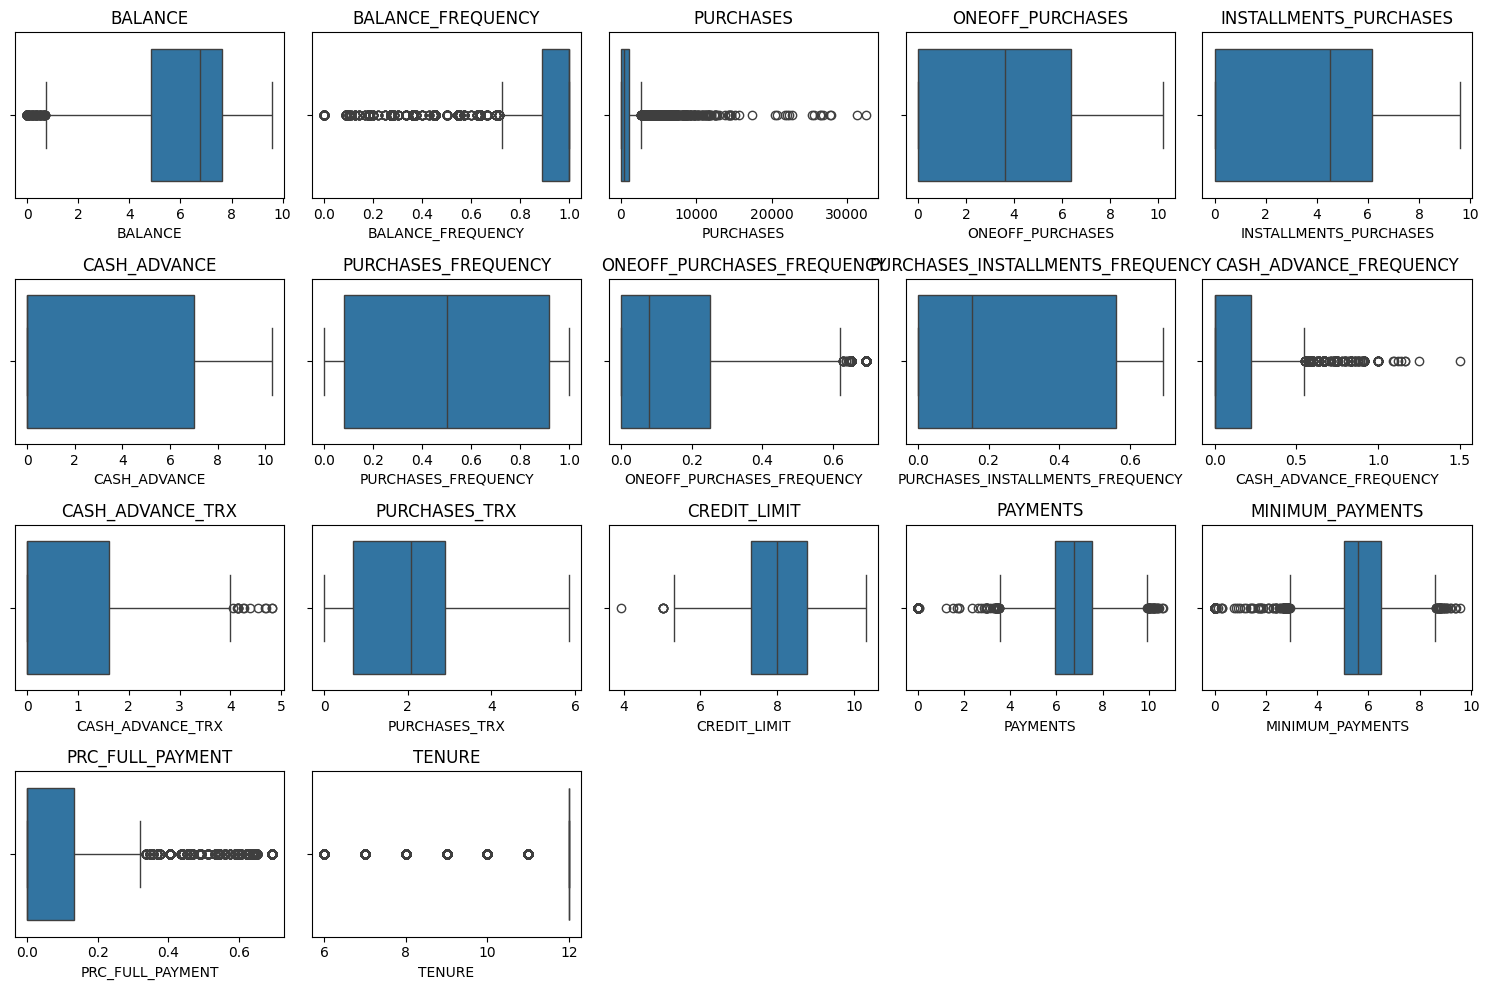

In [21]:
create_boxplots(df)

# **➥ DATA PREPROCESSING**

## ♢ **KORELASI**

Cek Korelasi untuk mengecek relevansi fitur-fitur kolom yang ada dengan target

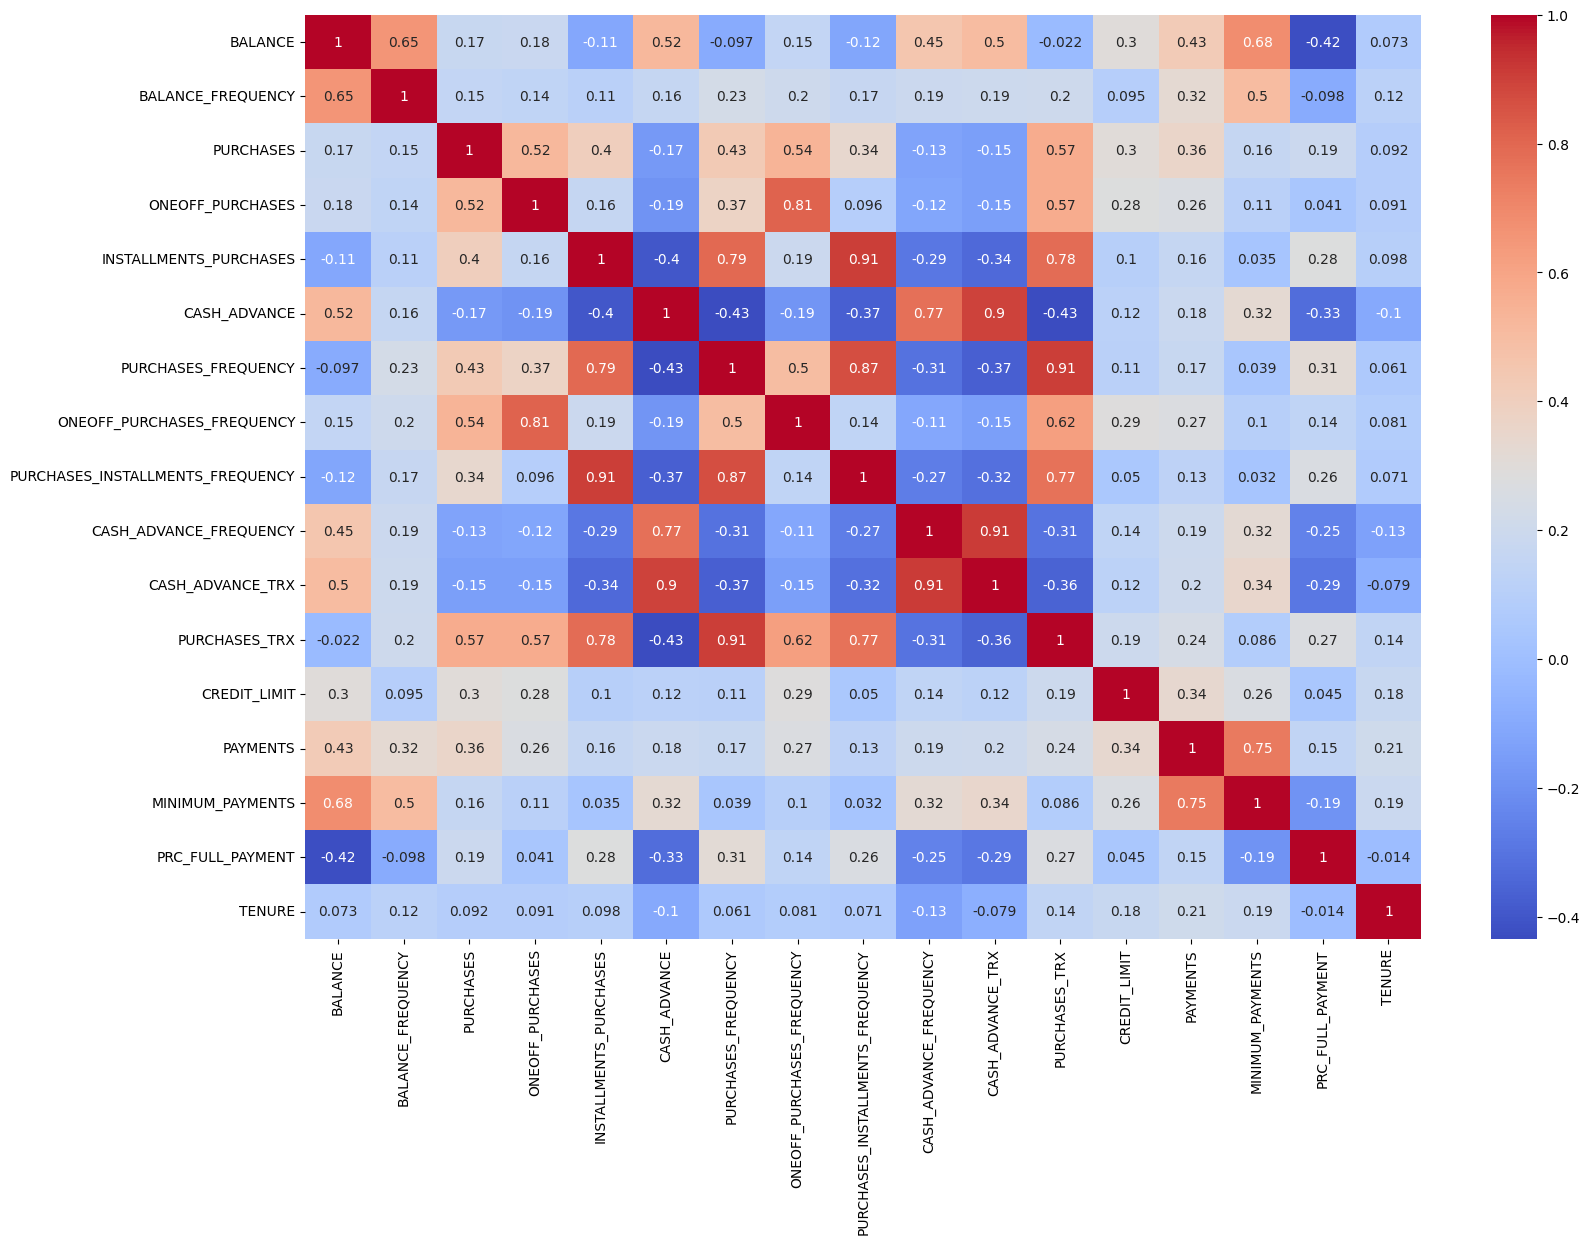

In [22]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# **➥ MODELLING**

## ♢ **SPLITTING DATA**

In [23]:
# Ambil variabel dan ubah ke np array
X = df.values

In [24]:
# Simpan CSV
df.to_csv('Dataset_Final/CC_GENERAL_modified.csv', index=False)

## ♢ **MODEL YANG AKAN DIGUNAKAN**

List Model yang akan saya gunakan adalah :
* Kmeans

Setelah itu saya juga akan melakukan PCA untuk mendapatkan kesimpulan dari keseluruhan data

## ♢ **CARI CLUSTER OPTIMAL**

Disini kita akan mencari nilai cluster yang optimal dan bagus untuk model kita menggunakan elbow method

In [25]:
# Set Parameter KMEANS
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}

# Temukan titik optimal
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

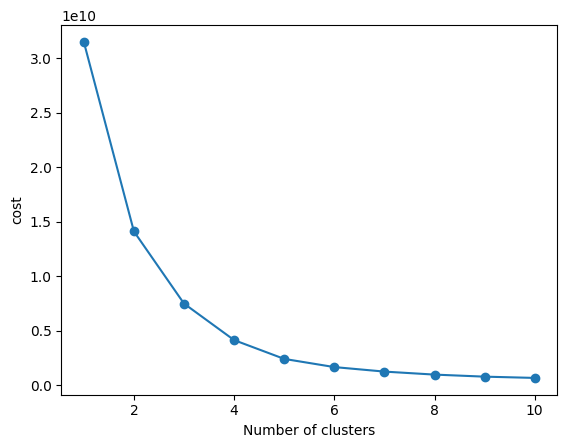

In [26]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('cost')
plt.show()

**ANALISIS** 🕵

Berdasarkan hasil diatas, menurut saya **n_cluster optimal dan bagus adalah nilai 4**. Karena setelah nilai 4 tingkat fluktuasi yang terjadi sudah tidak signifikan lagi dibandingkan sebelumnya

## ♢ **TRAIN MODEL**

Disini kita akan melatih model kita berdasarkan hasil cluster yang didapat

In [27]:
# Latih Model berdasarkan cluster optimal
kmeans = KMeans(n_clusters = 4, n_init=10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

## ♢ **EVALUASI MATRIX**

Berikut merupakan hasil evaluasi matrix **KMeans** dengan Silhoutte Score dan Davies-Bouldin Index

In [28]:
Pred = kmeans.predict(X)

# Evaluasi
print('Silhoutte score = ', silhouette_score(X, Pred))
print('Davies-Bouldin Index = ', davies_bouldin_score(X, Pred))

Silhoutte score =  0.7348813660005501
Davies-Bouldin Index =  0.4568085433694249


## ♢ **HASIL KMEANS**

Berikut merupakan beberapa visualisasi dan kesimpulan yang didapat berdasarkan KMeans

**1. Pertama-tama kita akan memasukkan hasil clustering pada dataframe kita**

In [29]:
df_kmeans = df
df_kmeans['cluster_id'] = kmeans.fit_predict(X)

In [30]:
df_kmeans['cluster_id'] = df_kmeans['cluster_id'].astype('category')

**2. Ubah kembali log transformasi ke skala semula untuk menunjukkan data yang sebenarnya**

In [31]:
# Ubah kembali log transformasi ke skala semula
for col in kolom:
    df_kmeans[col] = np.exp(df_kmeans[col])

### **👨‍👨‍👧‍👧 DISTRIBUSI CLUSTERING BERDASARKAN PURCHASE DENGAN SEMUA KOLOM 👨‍👨‍👧‍👧**

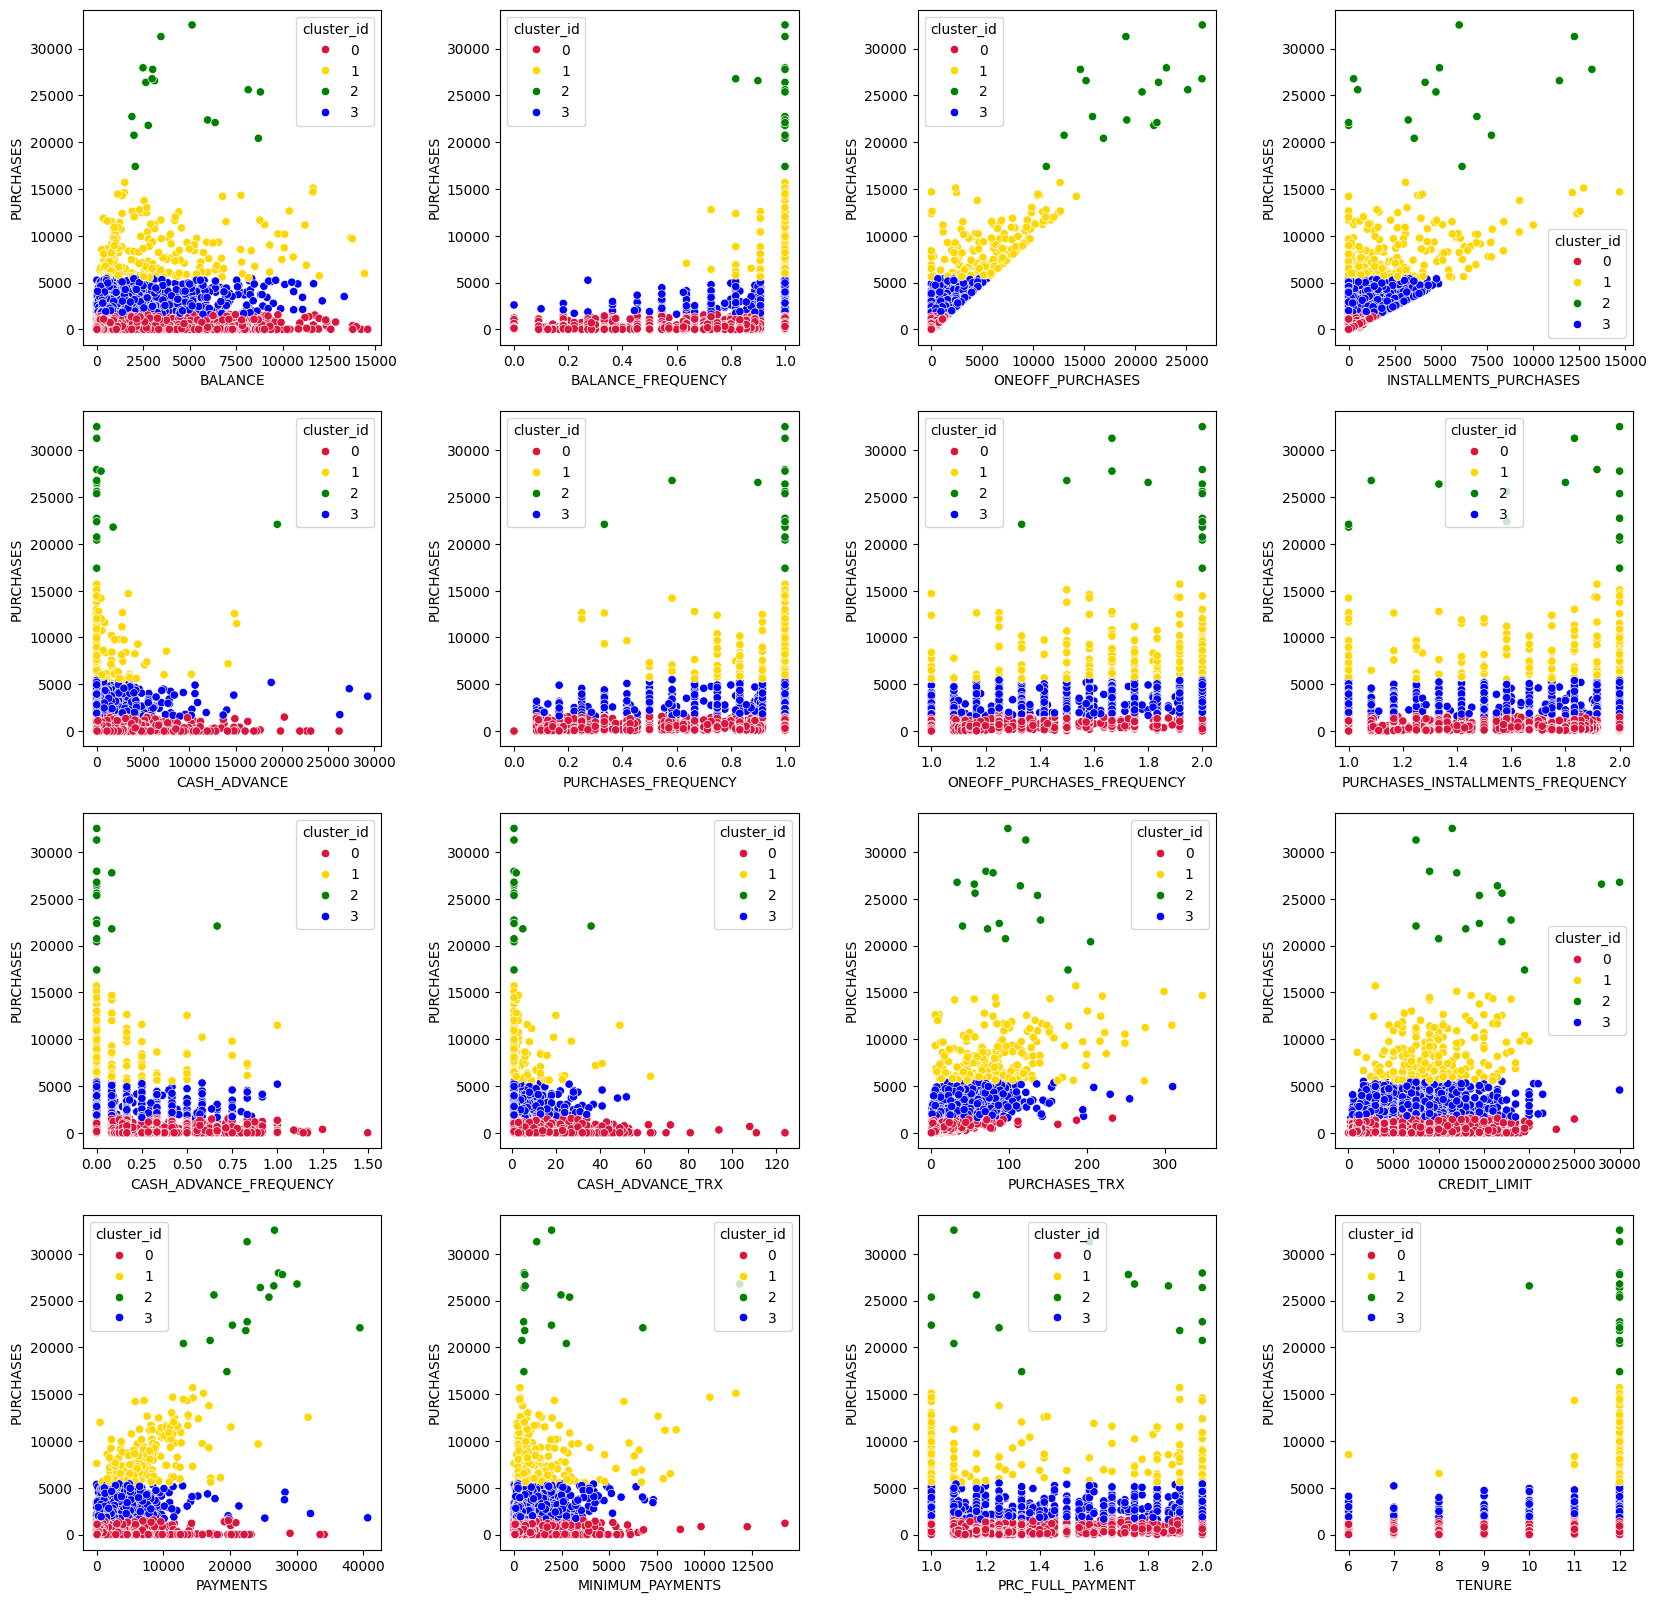

In [32]:
col_names=['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

plt.subplots(nrows=4, ncols=4, figsize=(20,20))
plt.subplots_adjust(wspace=0.4)

color = ["crimson","gold","Green", "Blue"]
n = 0 

for i in col_names:
    plt.subplot(4, 4, n+1)
    ax = sns.scatterplot(x = i , y  ='PURCHASES', hue='cluster_id', data = df_kmeans, palette = color)
    n+=1
    
plt.show()

## ♢ **HASIL PCA**

Berikut merupakan beberapa visualisasi dan kesimpulan yang didapat berdasarkan PCA

In [33]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

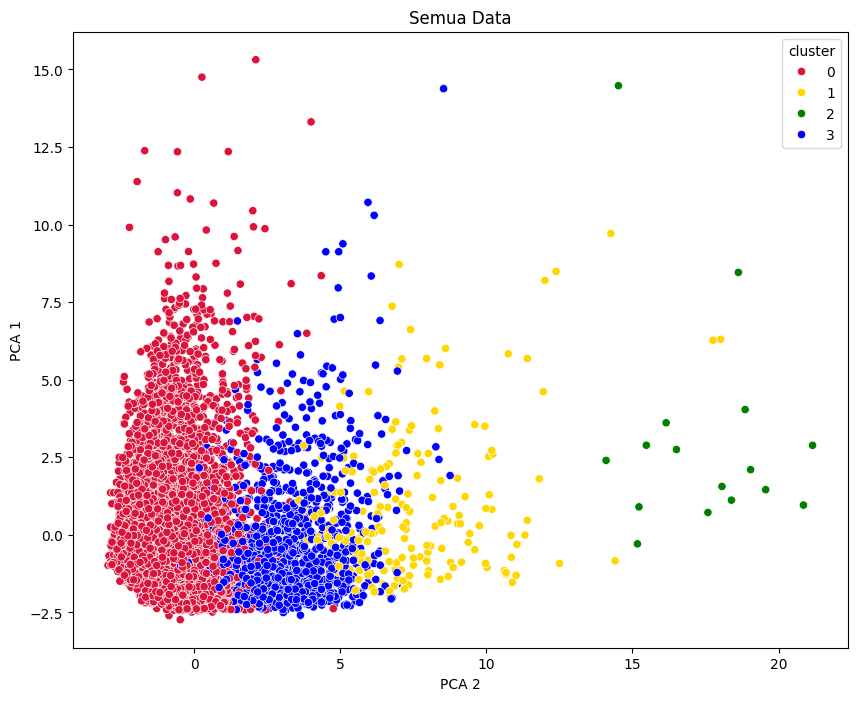

In [34]:
# PCA Parameter
pca = PCA(n_components = 2, svd_solver='full', random_state = 42)
X_PCA = pca.fit_transform(df_scaled)

# 2D Setting
pca2 = pd.DataFrame(data = X_PCA, columns = ['pca1', 'pca2'])
pca2.head()

# Buat kolom cluster
df_pca2 = pd.concat([pca2, pd.DataFrame({'cluster': Pred})], axis=1)
df_pca2.head()

# Plot 2D
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca2, palette=color)
plt.title('Semua Data')
plt.xlabel("PCA 2")
plt.ylabel("PCA 1")
plt.show()

# **➥ PIPELINE**

Disini kita akan membuat sebuah pipeline berdasarkan hasil evaluasi model kita

In [35]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(kmeans)

In [36]:
import pickle

with open("creditcard.pkl", "wb") as model_file:
    pickle.dump(kmeans, model_file)

In [37]:
import pickle

with open("creditcard.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [38]:
model

KMeans(n_clusters=4, n_init=10, random_state=42)